In [3]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install keras-visualizer

  Using cached keras_visualizer-2.4-py3-none-any.whl (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install graphviz

  Using cached graphviz-0.17-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras_visualizer import visualizer

In [45]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [12]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [13]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [14]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [15]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [16]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [17]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [18]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 30s 29ms/step - loss: 1.9643 - accuracy: 0.5001 - val_loss: 0.4682 - val_accuracy: 0.8791
Epoch 2/15
981/981 [==============================] - 31s 32ms/step - loss: 0.6487 - accuracy: 0.8126 - val_loss: 0.2415 - val_accuracy: 0.9343
Epoch 3/15
981/981 [==============================] - 31s 32ms/step - loss: 0.4079 - accuracy: 0.8832 - val_loss: 0.1206 - val_accuracy: 0.9704
Epoch 4/15
981/981 [==============================] - 31s 32ms/step - loss: 0.3281 - accuracy: 0.9057 - val_loss: 0.1017 - val_accuracy: 0.9751
Epoch 5/15
981/981 [==============================] - 31s 32ms/step - loss: 0.2906 - accuracy: 0.9197 - val_loss: 0.1228 - val_accuracy: 0.9703
Epoch 6/15
981/981 [==============================] - 31s 32ms/step - loss: 0.2457 - accuracy: 0.9304 - val_loss: 0.1395 - val_accuracy: 0.9615
Epoch 7/15
981/981 [==============================] - 31s 32ms/step - loss: 0.2696 - accuracy: 0.9274 - val_loss: 0.0989 - val_accuracy:

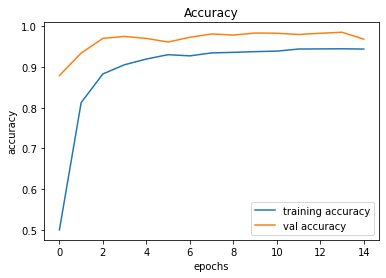

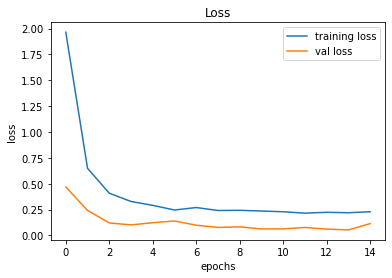

In [19]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
#pred=model.predict(X_test) 
#classes=np.argmax(pred,axis=1)
pred = np.argmax(model.predict(X_test), axis=-1)

38


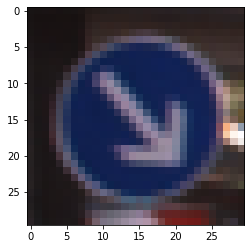

In [51]:
plt.imshow(data[5])
print(pred[5])

In [38]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
#model.save(‘traffic_classifier.h5’)

0.9415676959619953


In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(labels,pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 52   0   0 ...   0   0   0]
 [  0 687   6 ...   0   0   0]
 [  0   3 722 ...   0   0   0]
 ...
 [  0   0   0 ...  76   0   0]
 [  0   0   0 ...   0  31   0]
 [  0   0   0 ...   0   1  80]]


In [48]:
visualizer(model, format='png', view=True)